In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.5.0'

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train=", str(x_train.shape))
print("y_train=", str(y_train.shape))

x_train= (60000, 28, 28)
y_train= (60000,)


In [6]:
def printMatrixE(a):
    rows = a.shape[0]
    cols = a.shape[1]
    for i in range(0, rows):
        str1 = ''
        for j in range(0, cols):
            str1+= ("%3.0f" % a[i, j])
        print(str1)
    print("")
printMatrixE(x_train[0])
print('y_train[0]=', str(y_train[0]))

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [10]:
import matplotlib.pyplot as plt
import numpy as np

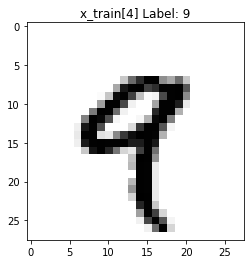

In [9]:
num = 4
plt.title('x_train[%d] Label: %d' % (num, y_train[num]))
plt.imshow(x_train[num], cmap=plt.get_cmap('gray_r'))
plt.show()

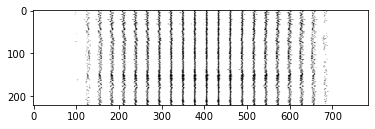

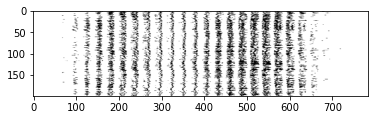

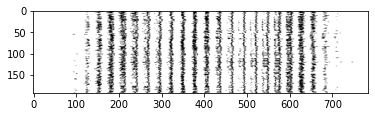

In [12]:
def display_mult_flat(start, stop, label):
    images = x_train[start].reshape([1, 784])
    for i in range(start+1, stop):
        label2 = int(y_train[i])
        if label == label2:
            images = np.concatenate((images, x_train[i].reshape([1, 28*28])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_mult_flat(0, 2000, 1)
display_mult_flat(0, 2000, 2)
display_mult_flat(0, 2000, 3)

In [14]:
from sklearn.datasets import load_digits

In [15]:
num_classes = 10
img_rows, img_cols = 28, 28

In [21]:
print('x_train before reshape: ', x_train.shape)
print('x_test before reshape: ', x_test.shape)
dim =  img_rows*img_cols*1
x_train = x_train.reshape(x_train.shape[0], dim)
x_test = x_test.reshape(x_test.shape[0], dim)
print('x_train after reshape: ', x_train.shape)
print('x_test after reshape: ', x_test.shape)

x_train before reshape:  (60000, 28, 28)
x_test before reshape:  (10000, 28, 28)
x_train after reshape:  (60000, 784)
x_test after reshape:  (10000, 784)


In [22]:
print("x_train before div 255:", x_train[0][180:195])
print("x_test before div 255:", x_test[0][180:195])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("x_train after div 255:", x_train[0][180:195])
print("x_test after div 255:", x_test[0][180:195])

x_train before div 255: [170 253 253 253 253 253 225 172 253 242 195  64   0   0   0]
x_test before div 255: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
x_train after div 255: [0.6666667  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235295 0.6745098  0.99215686 0.9490196  0.7647059  0.2509804
 0.         0.         0.        ]
x_test after div 255: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
print('y_train shape:', y_train.shape)
print(y_train[:10])
category=10
y_train2 = tf.keras.utils.to_categorical(y_train, category)
y_test2 = tf.keras.utils.to_categorical(y_test, category)
print('y_train2 to_categorical shape=', y_train2.shape)
print(y_train2[:10])

y_train shape: (60000,)
[5 0 4 1 9 2 1 3 1 4]
y_train2 to_categorical shape= (60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.relu, input_dim=dim))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=categoty, activation=tf.nn.softmax))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train2, batch_size=1000, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 1.8904 - accuracy: 0.3223
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 1.1429 - accuracy: 0.6892
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.7437 - accuracy: 0.7938
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.8321
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5177 - accuracy: 0.8537
Epoch 6/100
60/60 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.8673
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.8760
Epoch 8/100
60/60 [==============================] - 0s 7ms/step - loss: 0.4144 - accuracy: 0.8836
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 0.3950 - accuracy: 0.8888
Epoch 10/100
60/60 [==============================] - 0s 8ms/step - loss: 0.3782 - accuracy: 0.8929
Epoch 11/

60/60 [==============================] - 0s 5ms/step - loss: 0.1652 - accuracy: 0.9512
Epoch 84/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1650 - accuracy: 0.9508
Epoch 85/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1639 - accuracy: 0.9516
Epoch 86/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1634 - accuracy: 0.9515
Epoch 87/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9510
Epoch 88/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1620 - accuracy: 0.9520
Epoch 89/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1616 - accuracy: 0.9517
Epoch 90/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1614 - accuracy: 0.9520
Epoch 91/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1609 - accuracy: 0.9528
Epoch 92/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1604 - accuracy: 0.9521
Epoch 93/100


In [30]:
score = model.evaluate(x_test, y_test2, batch_size=128)
print("score=", score)
predict = model.predict(x_test)
print("Ans:", np.argmax(predict[0]), np.argmax(predict[1]), np.argmax(predict[2]), np.argmax(predict[3]))
predict2 = model.predict_classes(x_test[:10])
print("predict_classes:", predict2[:10])
print("y_test", y_test[:10])

79/79 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9443
score= [0.19985978305339813, 0.9442999958992004]
Ans: 7 2 1 0
predict_classes: [7 2 1 0 4 1 4 9 6 9]
y_test [7 2 1 0 4 1 4 9 5 9]


/home/jasonkuo/.local/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
